In [1]:
# Parameters
survey = "gama"


In [2]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from   astropy.table import Table

In [3]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [4]:
import pubplot
from   findfile import findfile

In [5]:
version = 'latest'
survey  = 'gama'
dryrun  = False

In [6]:
def grab_ddplimit(fpath):
    dat = fits.open(fpath)

    result = {}
    
    for key in ['RLIM', 'GMR_0P0', 'GMR_0P1', 'ALL']:
        result[key] = dat[1].header[key]
        
    result['DATA'] = Table(dat[1].data)
    result['COUNT'] = fpath.split('_')[-1].replace('.fits', '')
    
    return result

In [7]:
! pwd

/cosma/home/durham/dc-moor2/DESI


In [8]:
fpaths = glob.glob(os.environ['HOME'] + '/data/GAMA4/ddrp_limits/*.fits')

In [9]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

In [10]:
fpath = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
gama_kE = Table.read(fpath)
#gama_kE = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
123281,587724649255010654,175.33684943,-2.47765272,18.508278,0.07775,4,G12_Y6_051_026,6,20.005444,19.001768,18.43343,18.128056,17.895376,247.47013288954915,36.967613957681905,G12,-228.64338173556078,18.64987105624686,-9.926295790157884,228.46859526203986,-20.569740887948782,-10.15538225743375,0.5683384,18.508278,0.5947095088397611,0,4,-0.12145210218178723,-0.14782321685650926,0.09386676219384957,0.1144879373509757,0.5477172190079129,2.12,-0.075417496,-0.16482998,-18.477785330545366,-18.388372842502058,-18.553202826809347,36.98606322361177,36.896650735568464,-0.12191415624145123,-0.14852937903794905,0.09481072212074988,0.11664591067571423,-18.47872929047227
508557,587729971786940946,217.19946129,-1.5769885,19.355307,0.05606,4,G15_Y2_003_140,6,21.191936,20.02943,19.494352,19.263758,18.98756,175.59008312472253,36.22249992214916,G15,-132.38905442382938,-100.48679980208547,-4.57575189376695,133.2237844640646,99.37123117196604,-4.709335360060893,0.53507805,19.355307,0.5782485855455651,0,4,-0.14054202778484734,-0.18371256462435775,0.07198516985644665,0.07291179564533268,0.5341514229171687,2.12,-0.054378204,-0.1188472,-16.884800262591718,-16.820331267855046,-16.939178466639397,36.24010688795793,36.17563789322126,-0.14307149449320722,-0.18780013889648303,0.0736533838689939,0.07737515081718024,-16.886468476604264
278187,587726031189836412,214.37299238,1.09355577,19.774502,0.15595,4,G15_Y4_232_353,5,20.959604,20.024252,19.66941,19.422945,19.348568,523.9983853005301,38.59664974354315,G15,-374.0809586860361,-255.8796604306829,8.651329521932924,376.2255507132008,252.7284789081164,8.274099070057625,0.35484123,19.774502,0.2744785820574246,0,2,-0.12126437671598772,-0.04090172647360765,0.04493669967820002,0.12009801309513066,0.279679918882874,2.12,-0.15127149,-0.33061397,-18.71581315044143,-18.536470671927713,-18.867084642684244,38.490314950978544,38.310972472464826,-0.06760715201130102,0.02781821076256147,0.1491177263509001,0.29299350047622474,-18.819994177114133
279688,587726031693611569,138.75098304,1.00368548,19.595543,0.22079,4,G09_Y3_019_335,5,21.959982,20.51256,19.575455,19.184067,18.88176,772.8098224309778,39.44036316667786,G9,-475.87936380472416,417.32055725469064,11.088797612929003,472.3681041336928,-421.3030622273456,10.615167924119861,0.9371052,19.595543,0.6781044179507406,0,4,-0.011684348380550533,0.2473164125017167,0.21020627338842263,0.5403093953042624,0.6070020569171681,2.12,-0.2141663,-0.46807477,-19.840860233842797,-19.58695176356978,-20.05502653235144,39.43640314155764,39.18249467128462,-0.03474891025200881,0.20273170312397315,0.1819759681101923,0.4679069928376364,-19.812629928564565
226964,587726014008983767,211.54730519,1.27628899,18.608667,0.11458,4,G15_Y1_AN1_203,6,20.638006,19.155218,18.559296,18.18614,17.953371,374.3828461141339,37.866579707693525,G15,-286.18230568118366,-175.6979175476261,7.4816115560120835,287.6553704863744,173.2878838799524,7.193188291762481,0.59592247,18.608667,0.5750730352171625,0,4,-0.09401096449323777,-0.07316152961762677,0.11797768023358156,0.182

In [11]:
#gama_ddp = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp.fits')
fpath = findfile(ftype='ddp', version=version, dryrun=dryrun, survey=survey)
gama_ddp = Table.read(fpath)
gama_ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],DDPZLIMS [3],DDPMALL_0P0_VISZ
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,mag,mag,,,mag,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,int64,float64
123281,587724649255010654,175.33684943,-2.47765272,18.508278,0.07775,4,G12_Y6_051_026,6,20.005444,19.001768,18.43343,18.128056,17.895376,247.47013288954915,36.967613957681905,G12,-228.64338173556078,18.64987105624686,-9.926295790157884,228.46859526203986,-20.569740887948782,-10.15538225743375,0.5683384,18.508278,0.5947095088397611,0,4,-0.12145210218178723,-0.14782321685650926,0.09386676219384957,0.1144879373509757,0.5477172190079129,2.12,-0.075417496,-0.16482998,-18.477785330545366,-18.388372842502058,-18.553202826809347,36.98606322361177,36.896650735568464,-0.12191415624145123,-0.14852937903794905,0.09481072212074988,0.11664591067571423,-18.47872929047227,1.2917213,0.1405274458084947,0.0,-6.508278,0.003980023594705244,0.0,0 .. 1,1 .. 1,-17.1836360612024
508557,587729971786940946,217.19946129,-1.5769885,19.355307,0.05606,4,G15_Y2_003_140,6,21.191936,20.02943,19.494352,19.263758,18.98756,175.59008312472253,36.22249992214916,G15,-132.38905442382938,-100.48679980208547,-4.57575189376695,133.2237844640646,99.37123117196604,-4.709335360060893,0.53507805,19.355307,0.5782485855455651,0,4,-0.14054202778484734,-0.18371256462435775,0.07198516985644665,0.07291179564533268,0.5341514229171687,2.12,-0.054378204,-0.1188472,-16.884800262591718,-16.820331267855046,-16.939178466639397,36.24010688795793,36.17563789322126,-0.14307149449320722,-0.18780013889648303,0.0736533838689939,0.07737515081718024,-16.886468476604264,0.4446926,0.06861931872909628,0.0,-7.3553066,0.0019354033587702987,0.0,0 .. 0,1 .. 1,-16.433156214909655
278187,587726031189836412,214.37299238,1.09355577,19.774502,0.15595,4,G15_Y4_232_353,5,20.959604,20.024252,19.66941,19.422945,19.348568,523.9983853005301,38.59664974354315,G15,-374.0809586860361,-255.8796604306829,8.651329521932924,376.2255507132008,252.7284789081164,8.274099070057625,0.35484123,19.774502,0.2744785820574246,0,2,-0.12126437671598772,-0.04090172647360765,0.04493669967820002,0.12009801309513066,0.279679918882874,2.12,-0.15127149,-0.33061397,-18.71581315044143,-18.536470671927713,-18.867084642684244,38.490314950978544,38.310972472464826,-0.06760715201130102,0.02781821076256147,0.1491177263509001,0.29299350047622474,-18.819994177114133,0.025497437,0.1579620420584881,0.0,-7.774502,0.004260256333032649,0.0,0 .. 0,1 .. 0,-18.793359517282955
279688,587726031693611569,138.75098304,1.00368548,19.595543,0.22079,4,G09_Y3_019_335,5,21.959982,20.51256,19.575455,19.184067,18.88176,772.8098224309778,39.44036316667786,G9,-475.87936380472416,417.32055725469064,11.088797612929003,472.3681041336928,-421.3030622273456,10.615167924119861,0.9371052,19.595543,0.6781044179507406,0,4,-0.011684348380550533,0.2473164125017167,0.21020627338842263,0.5403093953042624,0.6070020569171681,2.12,-0.2141663,-0.46807477,-19.840860233842797,-19.58695176356978,-20.05502653235144,39.43640314155764,39.18249467128462,

In [12]:
gama_ddp.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

0	26	19.800	0.933	0.773	False
1	5	12.000	0.933	0.773	True
3	13	12.000	1.067	0.900	False
4	22	19.800	0.298	0.299	False
5	1	12.000	0.298	0.299	True
6	9	12.000	0.443	0.423	False
7	8	12.000	0.298	0.299	False
8	4	12.000	0.785	0.682	True
							FAINT: 27
9	27	19.800	1.067	0.900	False
10	16	19.800	0.443	0.423	True
11	12	12.000	0.933	0.773	False
12	0	12.000	0.131	0.164	True
13	23	19.800	0.443	0.423	False
14	18	19.800	0.785	0.682	True
15	6	12.000	1.067	0.900	True
16	25	19.800	0.785	0.682	False
17	14	19.800	0.131	0.164	True
18	10	12.000	0.603	0.555	False
19	2	12.000	0.443	0.423	True
20	21	19.800	0.131	0.164	False
21	24	19.800	0.603	0.555	False
							BRIGHT: 7
22	7	12.000	0.131	0.164	False
23	15	19.800	0.298	0.299	True
24	11	12.000	0.785	0.682	False
25	20	19.800	1.067	0.900	True
27	19	19.800	0.933	0.773	True


(-16.5, -22.5)

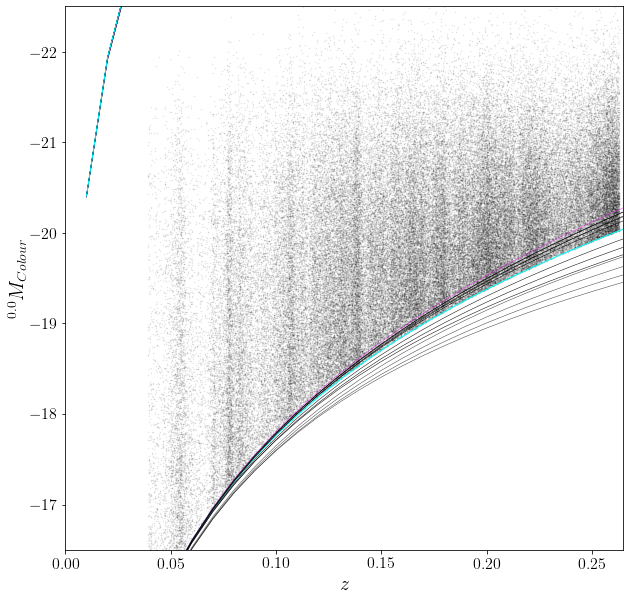

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

plt.scatter(gama_kE['ZGAMA'], gama_kE['DDPMALL_0P0'], s=0.25, alpha=0.1, c='k')

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']
    cnt  = ddp_limit['COUNT']
    rlim = ddp_limit['RLIM']
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if 'COLOR' in MCOL:
        alpha = 0.75
    else:
        alpha = 1.00
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
        continue
    
    if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tFAINT: {}'.format(cnt))
        
    elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tBRIGHT: {}'.format(cnt))
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
    
    print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('$^{0.0}M_{Colour}$')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

"\nfor idx, ax in zip(range(3), axes[::-1]):\n    zmin = gama_ddp.meta['DDP{}_ZMIN'.format(idx+1)]\n    zmax = gama_ddp.meta['DDP{}_ZMAX'.format(idx+1)]\n    \n    ax.axvline(zmin, lw=0.5, c='k')\n    ax.axvline(zmax, lw=0.5, c='k')\n"

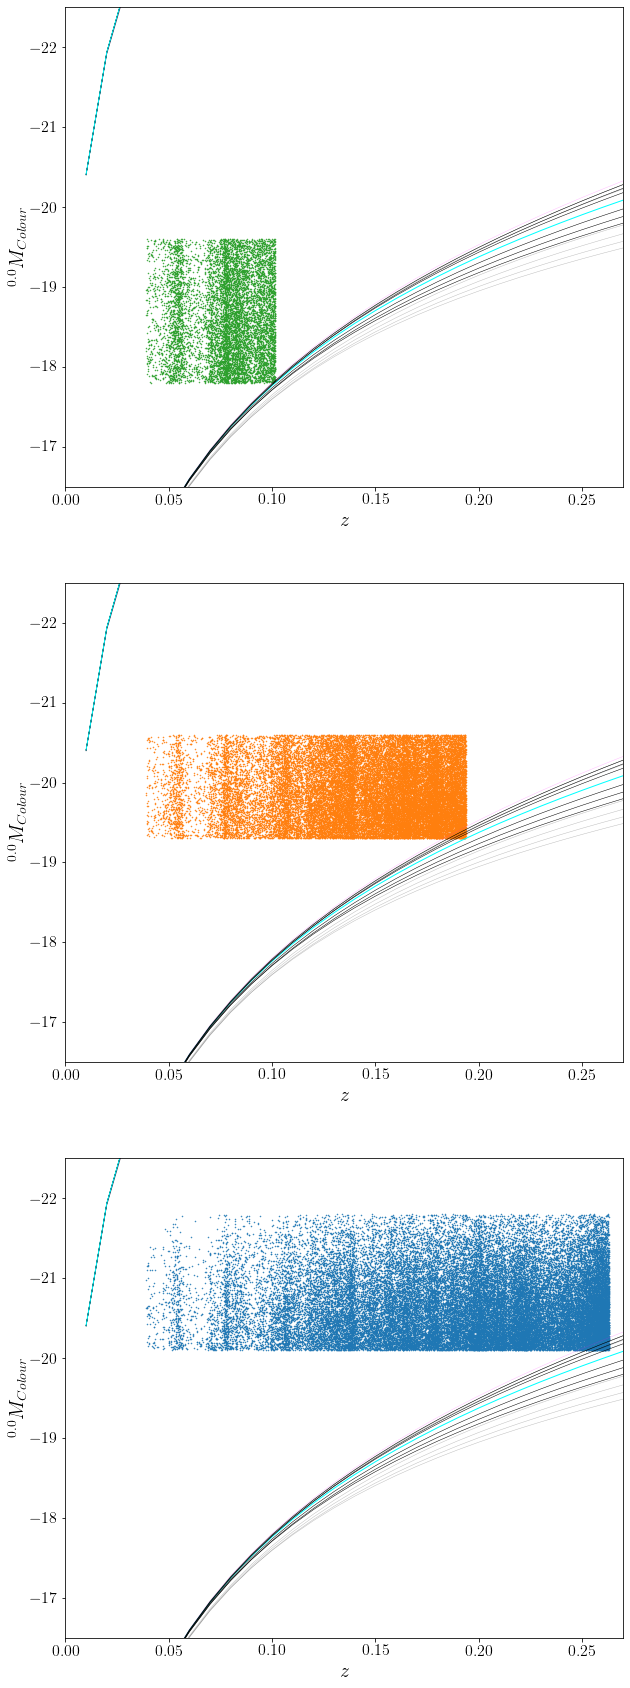

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(10,30))

colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ax in enumerate(axes[::-1]):    
    is_ddp = [x == 1 for x in gama_ddp['DDP'].data[:,i]]
    ax.scatter(gama_ddp['ZGAMA'][is_ddp], gama_ddp['DDPMALL_0P0'][is_ddp], s=0.25, alpha=1., c=colors[i])

for ax in axes:
    for i, ddp_limit in enumerate(ddp_limits):
        data = ddp_limit['DATA']

        cnt  = ddp_limit['COUNT']
        rlim = ddp_limit['RLIM']
        MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]

        if 'COLOR' in MCOL:
            alpha = 0.25
        else:
            alpha = 1.0

        if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
            ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
            continue
    
        if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        else:
            ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
        
        # print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
        ax.set_xlabel(r'$z$')
        ax.set_ylabel('$^{0.0}M_{Colour}$')
        
        ax.set_xlim(  0.0, 0.270)
        ax.set_ylim(-16.5, -22.5)

'''
for idx, ax in zip(range(3), axes[::-1]):
    zmin = gama_ddp.meta['DDP{}_ZMIN'.format(idx+1)]
    zmax = gama_ddp.meta['DDP{}_ZMAX'.format(idx+1)]
    
    ax.axvline(zmin, lw=0.5, c='k')
    ax.axvline(zmax, lw=0.5, c='k')
'''

# Done.